<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/ML_overview_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical Machine Learning**

Masters in Green Data Science, ISA/ULisboa, 2022-2023

Instructor: Manuel Campagnolo mlc@isa.ulisboa.pt

# Introduction and some basic concepts in Machine Learning (ML)

In this course we are dealing with data sets of *labeled examples*. Examples can be scalar numbers, rows of tabular data, images, etc. For tabular data, we refer the to columns as *explanatory variables* (sometimes also called *independent* or *descriptive* variables).

Labels can be categorical, ordinal or continuous. Labels can be refered to as the *response variable* (or *dependent* variable). They are also called *targets*. Typically, we the problems are called:
1. *Regression problems*, when the labels are continuous. 
2. *Classification problems*, when the labels are categorical.

The distinction is not always clear. Some problems can be considered either as regression or classification problems. 

Given a ML problem, i.e. a set of labeled examples, the goal is to build a function $f$ that maps examples to labels or, in other words, that predicts the label from the example.

The outputs of $f$ are called *predictions* or *predicted values*, and the actual labels of the examples are called *actual values* or *target values*.




## Python packages

In this ML course, the main Python packages are:

1. **Fastai**, a high-level package build from `pytorch`. A description of `fastai` is available in the paper *Howard, J.; Gugger, S. Fastai: A Layered API for Deep Learning. Information 2020, 11, 108. https://doi.org/10.3390/info11020108* and on the site https://docs.fast.ai/

2. **Pytorch**: PyTorch is an optimized tensor library for deep learning using GPUs and CPUs;  https://pytorch.org/docs/stable/index.html

3. **Scikit-learn**: Another high-level package build on `NumPy`, `SciPy`, and `matplotlib` which covers most ML techniques except deep learning;  https://scikit-learn.org/stable/index.html.

# Models and parameters


More formally, if $E$ is the set of examples and $L$ is a set that includes the labels, then what we call the *model* is a family of functions $f_{\rm \bf w}$ that depends on a set of parameters ${\rm \bf w}$: $$f_{\rm \bf w}: E → L.$$

It can be more convenient to express the function as depending on the parameters ${\rm \bf w}$ as well as the example ${\rm \bf x}$. The model's predicted label $\hat{y}$ for the example ${\rm \bf x}$ is:

$$\hat{y}=f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w}).$$

ML practicioners use an enormous variety of models, depending on the problem at hand and on the available computational resources to train the model. Models include convolucional neural networks (CNN) for image classification (resnet and other kind of CNNs), neural networks (NN) for classification of tabular data, linear regression models, decision and regression trees, random forest and other ensemble models, among many other models.


<img src="https://drive.google.com/uc?export=view&id=1rjcetay_O8EPd9mUHh4k1XFQIi84FfX2" width="800" >



## Example of a simple model (simple linear regression)

Suppose that our examples are scalar numbers $x_1,\dots, x_n$ and the labels are continuous labels $y_1, \dots, y_n$. We call $x$ the explanatory variable and $y$ the response variable. 

Let's consider the simple linear regression model:
$f_{\rm a,b}(x)= a \, x + b$. The model parameters are ${\rm \bf w}=(a,b)$ and the predicted values are given by$\\[1em]$ 
$$\hat{y}=f(x; {\rm a,b})=a\, x + b.$$

The target  or actual label values are the $y_1, \dots, y_n$, and the predicted label values are the $\hat{y}_1,\dots,\hat{y}_n$.



## Example of a simple model (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), a similar simple example was discussed. The only difference was that the model $f_{\rm a,b,c}$ was quadratic instead of linear: 

$$f_{\rm a,b,c}(x)= f(x;a,b,c)= a \, x^2 + b \, x + c.$$

In the illustration below, the observed (actual) values are plotted in blue, and the values preditted by the model for a fixed set of parameters $a=3, b=2, c=1$ are plotted in red.

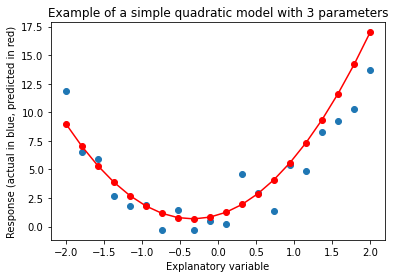

In [ ]:
# example from Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb
import numpy as np
import torch
import matplotlib.pyplot as plt
np.random.seed(42)
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
# create synthetic examples (x) and labels (y), and calculate predictions
x = torch.linspace(-2, 2, steps=20)[:,None]
def f(x): return 3*x**2 + 2*x + 1
y = add_noise(f(x), 0.15, 1.5)
ypred=f(x)
# plot 
plt.scatter(x,y);
plt.scatter(x,ypred,color='red');
plt.title("Example of a simple quadratic model with 3 parameters")
plt.xlabel("Explanatory variable")
plt.ylabel("Response (actual in blue, predicted in red)")
plt.plot(x, f(x), 'red')
plt.show()

# Loss function

In ML, it is usual to call *loss* to the **dissimilarity** between actual and predicted label values for a *set* of labeled examples.

Let ${\rm \bf x}_1, \dots , {\rm \bf x}_n$ be a set of examples with labels $y_1, \dots , y_n$. Let $f_{\rm \bf w}$ be our model. Therefore, the predicted labels are 

$$\hat{y}_1=f_{\rm \bf w}({\rm \bf x}_1), \dots, \hat{y}_n=f_{\rm \bf w}({\rm \bf x}_n).$$

The loss over that set of examples is some dissimilarity measure between the actual labels $y_1, \dots , y_n$ and the predicted labels $\hat{y}_1, \dots , \hat{y}_n$.



## Example (simple linear regression)



For the linear regression example, the response variable is continuous. We wish to measure the dissimilarity between the set of actual label values $y_1, \dots , y_n$  and the set of values predicted by the model 
$f_{\rm a,b}(x)= a \, x + b$: 

$$\hat{y}_1=a\, x_1+ b, \dots, \hat{y}_n=a\, x_n+ b.$$

Since the response is continuous, it makes sense to use a function like:

1. Mean absolute error (MAE), given by $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$.

## Example (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), loss was given by MAE, i.e. $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$.

In [ ]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

The notebook includes code to interactively change the parameter values and compute the MAE loss function for the data set for an arbitrary choice of weights $(a,b,c)$.

Function `partial` in the code below converts the 4-argument function $f(x,a,b,c)$ into a one argument function $f(x;a,b,c)=f_{\rm a,b,c}(x)$. Therefore, `mk_quad` corresponds to the one argument function $f_{\rm a,b,c}(x)$. Hence it can be passed to `plot_function` which expects a one argument function.



In [ ]:
from fastai.basics import * # necessary for partial
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
# interactive plot
from ipywidgets import interact
@interact(a=1.1, b=1.1, c=1.1) # this is called a decorator
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

## Dissimilarity measures to define *loss*


To define loss, we then need to choose an appropriate dissimilarity metric between a set of actual $y_1, \dots , y_n$ and predicted labels $\hat{y}_1, \dots , \hat{y}_n$. The choice depends on the type of problem, and while MAE or RMSE are adequate for *regression* problems, other dissimilarities are used for *classification* problems.




## Examples of loss functions for regression problems (MAE, MSE, Huber)



Above, two common loss functions for regression problems were listed

1. Mean absolute error (MAE), given by $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$

In the one hand, MAE is not differentiable everywhere, which is an undesirable property for ML. On the other hand, MSE penalizes too much large differences between actual and predicted values, which means that a single example can constraint strongly the solution. 

An alternative is called the Huber loss function, which is differentiable everywhere, and behaves like MSE near the origin and like MAE for large $|y_i-\hat{y}_i|$.


## Example of loss functions for classification problems (cross-entropy)

Classification problems have categorical labels. Therefore, the model predictions should return the most likely label for each example. 

While in regression, the model's output is typically an unbounded response variable (for instance, it is $f(x;a,b) = a\, x + b$ in simple linear regression), for classification problems, it is more convenient to have:
1. one output per label;
2. each output being a value between 0 and 1 that can be interpreted as the probability of the label.


<img src="https://drive.google.com/uc?export=view&id=1iD519g8QbBmOGp9SiOQsIneJnWg53SMQ" width="600" >

Therefore, it is usual to have a model that outputs $f_1({\rm \bf x};{\rm \bf w_1}), \dots , f_k({\rm \bf x};{\rm \bf w_k})$ for each of the $k$ possible labels, and an additional model component that converts those *raw* outputs into probability-like values for the labels.

You saw that kind of probabilistic output when you trained and deployed an image classifier in notebook [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb). When you did predict the label for a new example with

    learn_inf.predict('images/grizzly.jpg'),

you got a vector of estimated probabilities like the following:

    ('grizzly', tensor(1), tensor([9.0767e-06, 9.9999e-01, 1.5748e-07])).

where the values `9.0767e-06, 9.9999e-01, 1.5748e-07` correspond, respectively, to labels *black*, *grizzly* and *teddy*.




### Softmax 



The unormalized model outputs $f_1, \dots, f_k$ are called *logits* or *raw* outputs. Each $z_i=f_i({\rm \bf x};{\rm \bf w_i})$ is converted into a [0,1] value by the *softmax* function:

$$p_i=\frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_j)} ~~ {\rm which~implies~that} ~~ 0<p_i \le 1.$$

After that transformation, the classification model's output is a vector of values $(p_1,\dots,p_k)$, with $p_i \ge 0$ and $\sum p_i=1$ as required for  probability distributions. The predicted label is the one with highest $p$.


### Comparing target and predicted probability distributions



While in the regression problem the loss is a dissimilarity between the actual labels $y_1,\dots,y_n$ and the predicted labels $\hat{y}_1,\dots,\hat{y}_n$ for the set with $n$ examples, in classification with *softmax* the loss is then a dissimilarity between the actual labels $y_1,\dots,y_n$ and the $n$ probability vectors $(p_1,\dots,p_k)_1, \dots, (p_1,\dots,p_k)_n$.

To compare vectors of the same dimension, one can express each target label $y_i$ as a probabilitity distribution with 0 uncertainty. Suppose that there are 3 different possible labels and the actual label of the example is the first label: then, the *target distribution* would be $(1,0,0)$ which can be  compared with the model's output probability distribution $(p_1,p_2,p_3)$. This will be illustrated with an example below.




###Loss functions in fastai



A list of `fastai` loss functions is available in https://docs.fast.ai/losses.html. In general, they are simple adaptations of `pytorch` loss functions listed in https://pytorch.org/docs/stable/nn.html#loss-functions.  The most common *loss* function for classification is called *cross-entropy*. Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) creates the learner with:

    learn = vision_learner(dls, resnet18, metrics=error_rate)

`vision_learner` allows to explicitely define the loss function  with the argument `loss_func`. Since it is not explicitely defined in the code above, we can check the default which is stored in property `loss_func`:

    learn.loss_func

which returns `FlattenedLoss of CrossEntropyLoss()`. This `fastai` loss is described in the Pytorch documentation as the `nn.CrossEntropyLoss` class  [https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Hence, the loss function that is applied in the example in the notebook is  `torch.nn.CrossEntropyLoss` that computes the cross entropy loss between input logits and target. 



### Cross-entropy



So, what is the *loss* you see in the output when you train an image classifier in notebook [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb)?

    epoch 	train_loss 	valid_loss 	error_rate 	time
    0          1.174910        0.043982      0.009091     00:34


Suppose that your model (`resnet`) was trained to classify photos of bears into *black*, *grizzly* and *teddy* as in [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb). The last layer of the model outputs the values of three functions $f_1, f_2, f_3$, where $f_1$ is associated to *black*, $f_2$ is associated to *grizzly* and $f_3$ is associated to *teddy*. The values $(z_1,z_2,z_3)$ of the function for some input and for your trained model are the so-called *logits* or *raw* outputs. 

The code below creates an example of the outputs for a *batch* of 4 examples. In the matrix below each row is an example and each column is a label. Consider that column 1 is for *black*, column 2 is for *grizzly* and column 3 is for *teddy*.

In [ ]:
import torch
raws=torch.tensor([[4.5,2.1,0.2],
                   [1.3,8.3,0.8],
                   [1.2,1.5,4.2],
                   [5.1,0.4,2.3]])

Looking at the tensor above, it looks like the first and fourth examples have a higher likelihood of being photos of *black* bears, while the second example is more likely a *grizzly* bear and the third one seems to be a *teddy* bear photo. Let's apply *softmax* to convert the raw outputs into probability-like values.

In [ ]:
 softs = raws.softmax(dim=1)
 torch.set_printoptions(sci_mode=False)
 softs

tensor([[    0.9056,     0.0822,     0.0123],
        [    0.0009,     0.9985,     0.0006],
        [    0.0446,     0.0602,     0.8953],
        [    0.9347,     0.0085,     0.0568]])

It is clear that the softmax rule did amplify the difference in values for each example. In each row there is one value close to 1 and the remainder values are close to 0. For each example, *cross-entropy* compares the target distribution with the probability distribution returned by *softmax*. 

Let's suppose that in fact, the first and last examples have actually label *black*, the second is actually *grizzly* and the third is actually *teddy*. Then the target distribution will be 1 for the correct label and 0 for the remaining labels. This is known as  *one-hot encoding* and it's illustrated by the rows of the following tensor (each row is one example):

In [ ]:
target=torch.tensor([[1.,0.,0.],
                     [0.,1.,0.],
                     [0.,0.,1.],
                     [1.,0.,0.]])

Cross-entropy loss measures the dissimilarity between the probability distribution returned by *softmax* $(p_1,p_2,p_3)$ and the target distribution $(t_1,t_2,t_3)$ for the $i$-th example with the expression, and takes values between 0 (optimal value associated to minimum uncertainty) and 1 (maximum value associated to maximum uncertainty, i.e. all probabilities are equal):

$$L_i=-\left( t_1 \, \log(p_1) + t_2 \, \log(p_2) + t_3 \, \log(p_3) \right) \in [0,1].$$

In the expression above, we suppose that the probabilities are non zero. 
For the whole batch of $n$ examples, the cross-entropy loss is given by the average of the $n$ individual loss values:

$$L=\frac{1}{n} \left( L_1+L_2+ \dots,L_n\right).$$

This can be computed with `nn.CrossEntropyLoss()` directly from the *raw* and *target* values as shown below:

In [ ]:
import torch.nn as nn
# compute loss
loss = nn.CrossEntropyLoss()
output = loss(raws, target)
print('Cross Entropy Loss: ', output)

Cross Entropy Loss:  tensor(0.0697)



# ML as an optimization problem



Now, we can define a ML problem as a optimization problem. Given

1.  a set of examples  ${\rm \bf x}_1, \dots , {\rm \bf x}_n$  with labels $y_1, \dots , y_n$
2. a model $f_{\rm \bf w}$
3. a *loss* function $L$

the goal is to determine the optimal set of parameters ${\rm \bf w}$ that minimize the loss $L$ over that set of examples.

## Training and validation sets

To prevent *overfitting* the parameters to the set of examples, an independent set of examples for *validation* are set apart. In general, the example data set with $N$ examples is partitioned into a subset with, say $0.2 \times N$ examples for validation and $0.8 \times N$ examples for training like we saw in [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb):

    bears = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=Resize(128))

where `RandomSplitter(valid_pct=0.2, seed=42)` indicates that 20% of the examples are used for validation.

The *training* data set is used to search for the optimal set of weights for the model, typically by iteratively updating the weights from a initial set of weights using *gradient descent* over the loss. The *validation* data set is used to compute the same loss metric over an independent set of examples.

By comparing the training and validation losses it is possible to assess issues in model behaviour like *high bias/underfitting*,  *high variance/overfitting*,  and *unrepresentativeness* of either training or validation set.

## Gradient descent and learning rate

Informally, a gradient measures how much the output of a function changes if you change the inputs a little bit.

Given a model $f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w})$ and a batch of examples ${\rm \bf x_1}, \dots, {\rm \bf x_n}$, we have seen how we can define a *loss* function 

$$L({\rm \bf x_1, \dots, x_n; w})= L_{\rm \bf x_1, \dots, \rm \bf x_n}(\rm \bf w).$$ 

We can write $L$ just a function of the weights since the ${\rm \bf x_i}$ are fixed for given batch of examples. Our goal is to find the set of weights ${\rm \bf w}$ that minimize $L({\rm \bf w})$. In order to do this iteratively, starting with an arbitrary set of initial weights, we would like to know how $L$ changes with a small change in the weights $\rm \bf w$ from the current set weights ${\rm \bf w}^{*}$.

This  is given by the gradient of $L$ with respect to ${\rm \bf w}$ at ${\rm \bf w}^{*}$, which is a vector with length equal to $m$=number of model parameters.

$$ \nabla L({\rm \bf w}^{*}) = \frac{\partial L}{\partial \rm \bf w}({\rm \bf w}^{*})= \left(\frac{\partial L}{\partial \rm w_1}({\rm \bf w}^{*}), \dots,  \frac{\partial L}{\partial \rm w_m}({\rm \bf w}^{*}) \right).$$


The vector $\nabla L({\rm \bf w}^{*})$ points to the direction from ${\rm \bf w}^{*}$ along which $L$ grows faster, so gradient descent follows the opposite direction $ - \nabla L({\rm \bf w}^{*})$. 

<img src="https://drive.google.com/uc?export=view&id=1-KGjbUaR1l3z879V_eJu7JutnSutqbdC" width="500" >



The steps of gradient descent algorithm are the following, when all examples are visited before updating the set of weights. In ML, one *epoch* corresponds to the processing of the totally of examples in the data set. So, for instance, if the algorithm runs for 20 epochs, then the model is applied to all examples 20 times.

---

1. Choose an initial set of weights ${\rm \bf w}^{*}$

2. For $i = 1, \dots, E$, where $E$ is the number of epochs, do:

   i) Cumpute $\nabla L({\rm \bf w}^{*})$

   ii) Update ${\rm \bf w}^{*}:={\rm \bf w}^{*} - \eta \, \nabla L({\rm \bf w}^{*}) $, where $\eta >0 $ is the learning rate.

---

The choice of the *learning rate* is critical for a good performance of the algorithm. A very small learning rate will permit a good approximation of the gradient flow by the algorithm (see next figure). But if the step is too small, many epochs will be needed to get a good solution. 

<img src="https://drive.google.com/uc?export=view&id=12c4X3po4-xVGUJKzyKC56lwl4ZEmXqWa" width="400" >




ML practicioners use many different techniques to determine the *learning rate*. In particular, the learning rate can be adaptive and change along epochs, which is a standard approach in ML. An adaptive learning rate is provided by the `fine_tune` method used in   [Lesson1_02_saving_a_basic_fastai_model.ipynb](Lesson1_02_saving_a_basic_fastai_model.ipynb):

    learn = vision_learner(dls, resnet18, metrics=error_rate)
    learn.fine_tune(3)



## Mini-Batch Gradient Descent applied to simple linear regression

The description above of the gradient descent algorithm is for the simplest case, where weights are updated once per epoch. This is called *batch gradient descent*. Things get a bit more envolved if one wants to group examples in smaller batches and update the weights after each batch, which is the most common approach in ML. There is another alternative, called *stochastic gradient descent*, where weights are updated after each single example (this is the particular case of a mini-batch of size 1).

Next, we create from scratch a gradient descent for the very simple linear regression problem, and we compare the result with the optimal least squares regression. The code shows how *training loss* and *validation loss* are computed. It also illustrates how weights update are done after each mini-batch of data, which is known as *Mini-Batch Gradient Descent*.

The most specific part of the algorithm is the gradient computation. Note that the *gradient machinery* of `pytorch` is turned-on for each weight with `requires_grad = True` as in the following case:

    coeffs=torch.tensor([-20.,-10.]).requires_grad_()

Then, the *loss* $L$ is defined as a function (that can be arbitrarily complicated) of the weights, and the *gradient* $\nabla L({\rm \bf w}^{*})$ for the current set of weights ${\rm \bf w}^{*}$ is computed with 

    loss.backward()

Finally, the weights are updated with 

    coeffs.sub_(coeffs.grad * step_size)

where method `sub_` computes the substraction in weight updating ${\rm \bf w}^{*}:={\rm \bf w}^{*} - \eta \, \nabla L({\rm \bf w}^{*})$, and  the learning rate $\eta$ is called `step_size` in the code.


coefficients: [2.0237875] [[-5.0023813]]
batch size: 20
coeffs found by gradient descent: tensor([ 2.0390, -5.0677])


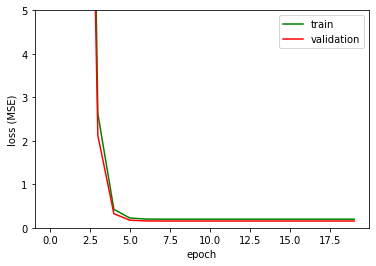

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
torch.manual_seed(42)

B=20 # batch size
step_size = 0.1 # learning rate
iter=20 # number epochs

############################################ Creating synthetic data
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1) # rank-2 tensor
func = -5 * X + 2
# Adding Gaussian noise to the function f(X) and saving it in Y
y = func + 0.4 * torch.randn(X.size())

##################################### Create train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

########################################## Baseline: Linear regression LS solution
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print('coefficients:',reg.intercept_,reg.coef_)

####################################################### Gradient Descent
# initial weights
coeffs=torch.tensor([-20.,-10.]).requires_grad_() 

# defining the function for prediction (linear regression)
def calc_preds(x): return coeffs[0] + coeffs[1] * x 

# Computing MSE loss for one batch of exemples
def calc_loss_from_labels(y_pred, y): return torch.mean((y_pred - y) ** 2)

# lists to store losses for each epoch
training_losses=[]; validation_losses=[]

# epochs
for i in range(iter):
  # calculating loss as in the beginning of an epoch and storing it
    y_pred = calc_preds(X_train)
    training_losses.append(calc_loss_from_labels(y_pred, y_train).tolist())
    y_pred = calc_preds(X_valid)
    validation_losses.append(calc_loss_from_labels(y_pred, y_valid).tolist())
    # mini-batch gradient descent: weight are updated after each batch
    for idx_start in np.arange(0,X_train.shape[0],B):
        # create batch
        batch_X=X_train[idx_start:(idx_start+B),:]
        batch_y=y_train[idx_start:(idx_start+B):]
        # making a prediction in forward pass
        y_pred = calc_preds(batch_X)
        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, batch_y)
        # compute gradient
        loss.backward()
        with torch.no_grad():
            # update coeffs
            coeffs.sub_(coeffs.grad * step_size)
            # zerofy gradients (because they add up)
            coeffs.grad.zero_()

print('batch size:', B)
print('coeffs found by gradient descent:',coeffs.requires_grad_(False))
plt.plot(training_losses, '-g',  validation_losses, '-r')
plt.gca().legend(('train','validation'))
plt.ylim(0, 5)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
#plt.title("Train (green) and validation (red) losses")
plt.show()

# Assessing ML performance

## Error rate and accuracy

Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) uses  `error_rate` when creating the `learner`:

    learn = vision_learner(dls, resnet18, metrics=error_rate)

    learn.fine_tune(3)

where `dls` is a `DataLoaders` object with the input data, `resnet18` is a deep CNN model. The argument `metrics=error_rate` indicates that the overall performance of the algorithm is measured proportion of mismatches between the set of actual labels $y_1, \dots , y_n$ and the set of predicted labels $\hat{y}_1, \dots , \hat{y}_n$. A very similar metric is `accuracy` which is simply `1-error_rate`. 

When one trains a classifier in `fastai`, the output for the training epochs looks like

<img src="https://drive.google.com/uc?export=view&id=1PJ36nJ-Isu-LThJTFwRj7XwVY5qWeRfJ" width="300" >

One could wonder how the  `error_rate` is computed when the data set is divided into *training* and *validation* sets. In `fastai`, because the training set and validation set are integrated into a single class (`dataloaders`),  by default the metrics displayed during training (as in the output above) use the validation set, so the `error_rate`is computed over the validation set.

At this pont it should be clear what `epoch`, `train_loss`, `valid_loss` and `error_rate` in the above training output along the epochs is.

There are many metrics other than `error_rate` for measuring the performance of *regression* and *classification* problems. For instance, `scikit-learn` provides the metrics listed in 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. The package `fastai`  includes  all metrics from `scikit-learn` and some additional ones. The documentation is available at https://docs.fast.ai/metrics.html. 




## Confusion matrix

In [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb), to understand in detail which  mistakes the model is making,  a confusion matrix (also called an *error matrix*) was created with 

    interp = ClassificationInterpretation.from_learner(learn)

    interp.plot_confusion_matrix()

which output was: 

<img src="https://drive.google.com/uc?export=view&id=1zsTJ7wh6KneWG7_QuXijy5LDlJiu3K-F" width="300" >


The comment in the notebook for this figure is the following: The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. *It is (of course!) calculated using the validation set*. 


# Some specific models for ML

## Tabular data

So far the examples from scratch above (simple linear regression, quadratic regression) dealt with *scalar* inputs, i.e. each example was described by a single number. 

Examples can also be tabular data, where each example is described by a numeric vector. Formally, the $i$-th example is described by a vector  $(x_{i1}, \dots, x_{ik})$ of length $k$, for examples $i = 1, \dots, n$ and labels are $y_1, \dots,  y_n$  as before.




### Perceptron

The *perceptron* is one of the simplest models for numerical tabular data and 0/1 classification problems.

<img src="https://drive.google.com/uc?export=view&id=1HqHfJn7ejJMGeAa5fTTQzW_myubIDsDh" width="600" >


The model is 

$$f_{\rm \bf w}(x_1,\dots,x_k)= \sigma (w_1 \, x_1 + \dots + w_k \, x_k)$$

where $\sigma(.)$ is the activation function, and it is defined by 

$$\sigma(z) = \left\{\begin{align}
1 &, &  z \ge t \\
0 &, &  z < t \\
\end{align} \right.$$

where $t$ is some *threshold*.


The code below is an adaptation of the code for simple linear regression, where the examples are tabular data instead of just scalar values, and the classes are 0/1 as in the *Titanic* example in notebook [Lesson5_edited_for_colab_linear_model_and_neural_net_from_scratch.ipynb](Lesson5_edited_for_colab_linear_model_and_neural_net_from_scratch.ipynb).

Here, we consider that the input data as already been pre-processed, and all explanatory variables $(x_{i1},\dots,x_{ik})$ are numerical, while the response variable is $y_i \in \{0,1\}$. for $n$ examples $i=1,\dots,n$.

In matrix form, we have for $n$ examples $i=1,\dots,n$:

$
	{\rm \bf X}= \begin{bmatrix} 
	x_{11} & \dots & x_{1k} \\
	\dots & x_{ij} & \dots\\
	x_{n1} & \dots & x_{nk} \\
	\end{bmatrix}~~~~~~
$
$
	{\rm \bf y}= \begin{bmatrix} 
	y_1  \\
	\dots \\
	y_n  \\
	\end{bmatrix}
$

Each example corresponds to a row of ${\rm \bf X}$, i.e. $(x_{i1},\dots,x_{ik})$
and has label $y_i \in \{0,1\}$. 

To prevent discontinuities, one can choose instead for $\sigma(.)$  a continuous function. The usual candidate is the *sigmoid* function

$$\sigma(z)= \frac{1}{1+e^{-z}}$$

that ranges between 0 and 1. This function is available in `pytorch` through `torch.sigmoid`. 



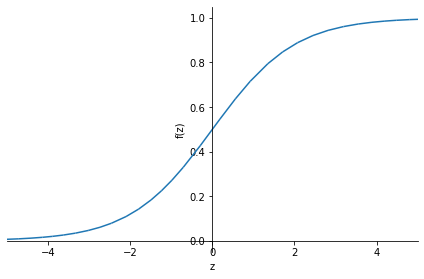

In [ ]:
import sympy
sympy.plot("1/(1+exp(-z))", xlim=(-5,5));


The following code allows you to compare results from multiple linear regression and the perceptron for the Titanic data set problem. Try changing some parameters for gradient descent to see what happens.

coefficients MLR: [0.5854171] [[-0.0042809  -0.04922816 -0.03017007  0.05970862 -0.5046148   0.22423151
   0.1791499   0.07168674  0.04639366]]


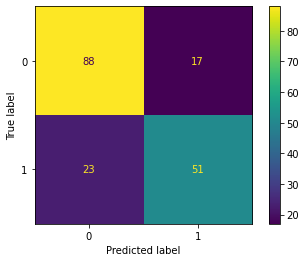

coefficients GD: tensor([-0.1556, -0.2370, -0.0379,  0.5963, -0.2736,  0.2682, -0.1691,  0.4525,
         0.2108, -0.2639,  0.3828,  0.0457])


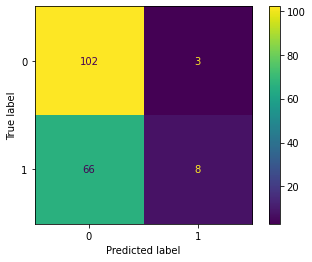

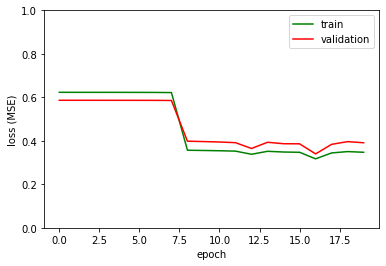

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
torch.manual_seed(42)

B=20 # batch size
lr = 0.1 # learning rate
iter=20 # number epochs

############################################ Reading Titanic numerical data, i.e., X and y
var_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
path=Path('/content/drive/MyDrive/AAA/Lesson_5/titanic_data') # adapt to your path
X,y=torch.load(path/'titanic_tensor_data_set.ts') # these values are not yet normalized
y=y[:,None] # to turn it into a column vector

##################################### Create train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

############################################## Ordinary least squares solution with 0.5 threshold
# variables to keep to avoid linear dependencies
var_keep=['Age', 'SibSp', 'Parch', 'LogFare', 'Sex_male',  'Pclass_1', 'Pclass_2',  'Embarked_C', 'Embarked_Q']
keep=np.isin(var_names,var_keep) # boolean list
# 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train[:,keep], y_train)
print('coefficients MLR:',reg.intercept_,reg.coef_)
y_pred=reg.predict(X_valid[:,keep])
disp = ConfusionMatrixDisplay(confusion_matrix(y_valid,(y_pred>0.5)))
disp.plot()
plt.show()

####################################################### Gradient Descent
# if you want to standardize X and include an additional additive coefficient to the model:
if False: 
  means = X.mean(dim=1, keepdim=True)
  stds = X.std(dim=1, keepdim=True)
  X=normalized_data = (X - means) / stds
  # add column
  ones=torch.ones(X.shape[0]).reshape(X.shape[0],1)
  X=torch.cat((ones,X),1)
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# initial weights
def init_coeffs(n_coeff): return (torch.rand(n_coeff,1)-0.5).requires_grad_() # creates a column matrix

# defining the function for prediction: the output is a vector of size=nrows(X)
def calc_preds(coeffs,X): return  torch.sigmoid(X@coeffs) # using matrix multiplication (aka matmul)

# Computing MSE loss for one batch of exemples: the output is a scalar
def calc_loss_from_labels(y_pred, y): return torch.mean((y_pred - y) ** 2)

# update coeffs
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    # zerofy gradients (because they add up)
    coeffs.grad.zero_()

# compute initial weights as a column matrix
n_coeff = X_train.shape[1] # number of columns of X, or X_train, or X_valid
coeffs = init_coeffs(n_coeff)

# create lists to store losses for each epoch
training_losses=[]; validation_losses=[]

# epochs
for i in range(iter):
  # calculating loss as in the beginning of an epoch and storing it
    y_pred = calc_preds(coeffs,X_train)
    training_losses.append(calc_loss_from_labels(y_pred, y_train).tolist())
    y_pred = calc_preds(coeffs,X_valid)
    validation_losses.append(calc_loss_from_labels(y_pred, y_valid).tolist())
    # mini-batch gradient descent: weight are updated after each batch
    for idx_start in np.arange(0,X_train.shape[0],B):
        # create batch
        batch_X=X_train[idx_start:(idx_start+B),:]
        batch_y=y_train[idx_start:(idx_start+B):]
        # making a prediction in forward pass
        y_pred = calc_preds(coeffs,batch_X)
        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, batch_y)
        # compute gradient
        loss.backward()
        with torch.no_grad():
            # update coeffs
            update_coeffs(coeffs, lr)

# predictions and confusion matrix
print('coefficients GD:',torch.flatten(coeffs.requires_grad_(False)))
y_pred=calc_preds(coeffs,X_valid)
disp = ConfusionMatrixDisplay(confusion_matrix(y_valid,(y_pred>0.5)))
disp.plot()
plt.show()

# plot losses along epochs
plt.plot(training_losses, '-g',  validation_losses, '-r')
plt.gca().legend(('train','validation'))
plt.ylim(0, 1)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
#plt.title("Train (green) and validation (red) losses")
plt.show()

### Feed-forward fully connected neural network with ReLu and sigmoid units

The next step is to add more layers to the model. Instead of having just one output from the first (input) layer, the model can have many units in the following *hidden* layers. In general, the number of model outputs (output layer) is equal to the number of labels (one is enough for the Titanic problem, since the prediction is just "survived" or not). As mentioned earlier, typically there is either a *sigmoid* unit or a *softmax* layer to complete the model, so the final outputs can be interpreted as probabilities.

If all the intermediate layers would model one matrix multiplication, the model could be simply reduced to a single matrix multiplication layer. Therefore, there must some non-linearity after each matrix multiplication. That's what is described in the following figure, where $f$ represents some non-linear *activation function* for each layer of the neural network.

<img src="https://drive.google.com/uc?export=view&id=1Ky82nfC7GUp7YBqp1Spzn9aHDrTzbiCH" width="600" >

The layer is called *fully connected* when each matrix multiplication, which returns the dot product $x_1 \, w_1 + \dots + x_n \, w_n$ envolves all neurons from the previous layer. 

Typically, all activation functions ($f$ in the figure above) for the *hidden layers* are called rectified linear units (*ReLu*) and they represent the following continuous function, which is the identity function for positive arguments and *zero* for negative arguments.

$${\rm ReLu}(z) = \left\{\begin{align}
z &, &  z \ge 0 \\
0 &, &  z < 0 \\
\end{align} \right.$$

If there is only one output, the activation layer for the *output layer* is typically the *sigmoid* function. If there is more than one output (as in the figure above), the typical choice of activation function for the output layer is the *softmax* function.

For first *neuron* in the first hidden unit, the calculation goes exactely as  we discussed for the perceptron model, where the inputs are multiplied by the  weights $w_1^{(1)},\dots, w_4^{(1)}$ to return

$$w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 .$$

The same product is computed for the second neuron of the first hidden layer, but for a *different set of weights* $w_1^{(2)},\dots, w_4^{(2)}$, and so on. Hence, in total there are for the example in the figure above, 12 multiplicative weights (4 input variables $\times$ 3 neuros in the hidden layer). The three multiplications (for the three neurns in the hidden layer) can all be done with a single matrix multiplication:

If the weights and input values are  $~~~~~
	{\rm W}= \begin{bmatrix} 
	w_{1}^{(1)} & w_{2}^{(1)} & w_{3}^{(1)} & w_{4}^{(1)} \\
	w_{1}^{(2)} & w_{2}^{(2)} & w_{3}^{(2)} & w_{4}^{(2)} \\
	w_{1}^{(3)} & w_{2}^{(3)} & w_{3}^{(3)} & w_{4}^{(3)} \\
	\end{bmatrix}~~~{\rm and}~~~~
$
$
	{\rm x}= \begin{bmatrix} 
	x_1  \\
	x_2 \\
	x_3  \\
	x_4  \\
	\end{bmatrix}~~~
$

then, the hidden layer three outputs (before applying the activation function) are just the rows of the product ${\rm W} \, {\rm x}$:

$$ {\rm  W} \, {\rm x}= \begin{bmatrix} 
	w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4  \\
	w_1^{(2)} \, x_1 + w_2^{(2)} \, x_2 + w_3^{(2)} \, x_3 + w_4^{(2)} \, x_4  \\
	w_1^{(3)} \, x_1 + w_2^{(3)} \, x_2 + w_3^{(3)} \, x_3 + w_4^{(3)} \, x_4  \\
	\end{bmatrix}
.$$

This is very convenient since matrix multiplication can be computed quickly.

Note that it is usual to include also an *additive weight* for each neuron (this is called the *bias*). Without lost of generality, we can think that $x_1$ is an artificial input which value is always 1, and therefore $w_1^{(j)} \times x_1=w_1^{(j)}$ is the additive weight. In alternative, we can add a weight $w_0^{(j)}$ to each neuron, so the neuron output (before applying the activation function) is 

$$w_0^{(1)} + w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 $$

in the above example.

Putting everything together, the three outputs of the first hidden layer are:

$$
	\begin{align}
	 {\rm ReLu} \left(w_0^{(1)} + w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 \right)  \\
   {\rm ReLu} \left(w_0^{(2)} + w_1^{(2)} \, x_1 + w_2^{(2)} \, x_2 + w_3^{(2)} \, x_3 + w_4^{(2)} \, x_4 \right)  \\
 {\rm ReLu} \left(w_0^{(3)} + w_1^{(3)} \, x_1 + w_2^{(3)} \, x_2 + w_3^{(3)} \, x_3 + w_4^{(3)} \, x_4 \right)  \\
	\end{align}
$$

Then, calculations proceed to the following layer, and so on, until they include the output layer. This network is called *feed-forward* because computations are done sequentially layer by layer.

